In [0]:
import mlflow
import mlflow.sklearn

import pandas as pd
import matplotlib.pyplot as plt

from numpy import savetxt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

In [0]:
df = load_diabetes()
X = df.data
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
print("Number of observations in X_train are : ", len(X_train))
print("Number of observations in X_test are : ", len(X_test))
print("Number of observations in y_train are : ", len(y_train))
print("Number of observations in y_test are : ", len(y_test))

Number of observations in X_train are :  331
Number of observations in X_test are :  111
Number of observations in y_train are :  331
Number of observations in y_test are :  111


In [0]:
n_estimators = 100
max_depth = 6
max_features = 3

# Create and train model

rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)

rf.fit(X_train, y_train)

# Use the model to make predictions on the test
predictions = rf.predict(X_test)

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

In [0]:
# Enable autolog()
# mlflow.libraryname[sklearn|torch|tensorflow|others].autolog()
# Check logged stuff in Experiments
mlflow.sklearn.autolog()

# With autolog() enabled, all model parameters, metrics, model score and fitted model are auto logged

with mlflow.start_run():

    # Set the model parameters
    n_estimators = 100
    max_depth = 6
    max_features = 3

    # Create and train model
    rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)

    rf.fit(X_train, y_train)

    # Use the model to make predictions on the test
    predictions = rf.predict(X_test)


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Logging more parameters and artifacts

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

2024/06/08 07:43:32 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.9.2/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

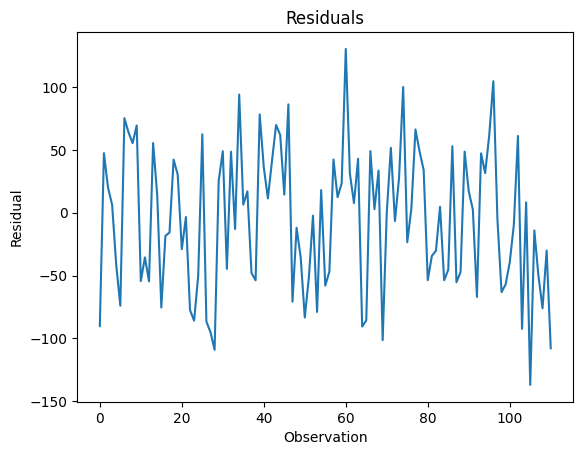

In [0]:
with mlflow.start_run():
  
  # Set the model parameters
  n_estimators = 100
  max_depth = 6
  max_features = 3
  
  # Create and train model
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)
  
  # Use the model to make predictions on the test dataset
  predictions = rf.predict(X_test)
  
  # Log the model parameters used for this run
  mlflow.log_param("num_trees_log", n_estimators)
  mlflow.log_param("max_depth_log", max_depth)
  mlflow.log_param("max_feat_log", max_features)
  
  # Define a metric to use to evaluate the model
  mse = mean_squared_error(y_test, predictions)
    
  # Log the value of the metric from this run
  mlflow.log_metric("mse_log", mse)
  
  # Log the model created by this run
  mlflow.sklearn.log_model(rf, "random-forest-model") 
  
  # Save the table of predicted values
  savetxt('predictions.csv', predictions, delimiter=',')
  
  # Log the saved table as an artifact
  mlflow.log_artifact("predictions.csv")
  
  # Convert the residuals to a pandas dataframe to take advantage of graphics capabilities
  df = pd.DataFrame(data = predictions - y_test)
  
  # Create a plot of residuals
  plt.plot(df)
  plt.xlabel("Observation")
  plt.ylabel("Residual")
  plt.title("Residuals")
 
  # Save the plot and log it as an artifact
  plt.savefig("residuals_plot.png")
  mlflow.log_artifact("residuals_plot.png")

## Detaching the model experiment from Notebook Experiments Tracker

In [0]:
experiment_name = "/Shared/diabetes_experiment/"
mlflow.set_experiment(experiment_name)
 
with mlflow.start_run():
  n_estimators = 100
  max_depth = 6
  max_features = 3
  
  # Create and train model
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)
  
  # Make predictions
  predictions = rf.predict(X_test)
  
  # Log parameters
  mlflow.log_param("num_trees", n_estimators)
  mlflow.log_param("maxdepth", max_depth)
  mlflow.log_param("max_feat", max_features)
  
  # Log model
  mlflow.sklearn.log_model(rf, "random-forest-model")
  
  # Create metrics
  mse = mean_squared_error(y_test, predictions)
    
  # Log metrics
  mlflow.log_metric("mse", mse)

2024/06/08 07:44:15 INFO mlflow.tracking.fluent: Experiment with name '/Shared/diabetes_experiment/' does not exist. Creating a new experiment.


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

2024/06/08 07:44:23 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.9.2/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

## Using Experiment IDs to run model under specific Expperiment

In [0]:
# Set an experiment name, which must be unique and case-sensitive
experiment = mlflow.set_experiment(experiment_name)
 
# Get Experiment Details
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))

Experiment_id: 298156566295888
Artifact Location: dbfs:/databricks/mlflow-tracking/298156566295888
Tags: {'mlflow.ownerId': '8816975281058981', 'mlflow.experiment.sourceName': '/Shared/diabetes_experiment', 'mlflow.ownerEmail': 'arpit7692@gmail.com', 'mlflow.experimentType': 'MLFLOW_EXPERIMENT'}
Lifecycle_stage: active


In [0]:
with mlflow.start_run(experiment_id=298156566295888):
  n_estimators = 100
  max_depth = 6
  max_features = 3
  
  # Create and train model
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)
  
  # Make predictions
  predictions = rf.predict(X_test)
  
  # Log parameters
  mlflow.log_param("num_trees", n_estimators)
  mlflow.log_param("maxdepth", max_depth)
  mlflow.log_param("max_feat", max_features)
  
  # Log model
  mlflow.sklearn.log_model(rf, "random-forest-model")
  
  # Create metrics
  mse = mean_squared_error(y_test, predictions)
    
  # Log metrics
  mlflow.log_metric("mse", mse)

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

2024/06/08 07:45:19 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.9.2/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]